# Modeling

It's time to get into the good stuff. Plan of attack:

1. Start with Naive-Bayes classifiers
2. Try some ensemble methods: boosting, bagging, stacking
3. In next notebook implement a CNN, because its what all the winners are using

In [ ]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Model testing
from sklearn.naive_bayes import MultinomialNB

# Helper functions
import sys
import os
sys.path.append(os.pardir)
from src.functions import *

In [4]:
X, y = get_training_data()
lab_ids = pd.DataFrame(y.idxmax(axis=1), columns=['lab_id'])

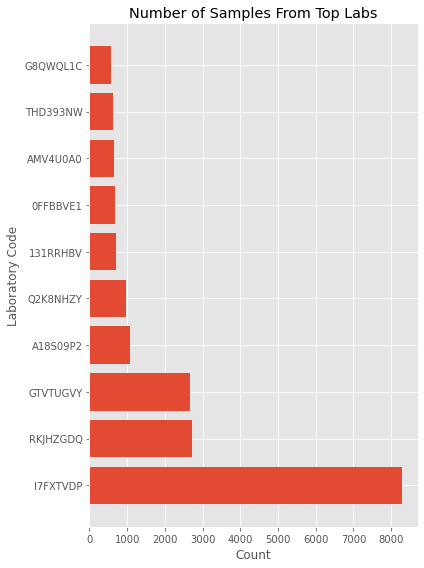

In [5]:
fig, ax = plt.subplots(figsize=(6, 8))
lab_counts = lab_ids.value_counts()
ax.barh([x[0] for x in lab_counts[:10].index], lab_counts[:10].values);
ax.set_title('Number of Samples From Top Labs')
ax.set_xlabel('Count')
ax.set_ylabel('Laboratory Code')
plt.tight_layout()
plt.savefig('../src/figures/samplecounts.png')

Obviously there is a crazy long-tail problem going on here. 

In [6]:
lab_ids.value_counts().describe()

count    1314.000000
mean       47.958143
std       262.552258
min         1.000000
25%         9.000000
50%        15.000000
75%        34.000000
max      8286.000000
dtype: float64

In [7]:
sum(lab_ids.value_counts() == 1)

2

In [8]:
X

,sequence,bacterial_resistance_ampicillin,bacterial_resistance_chloramphenicol,bacterial_resistance_kanamycin,bacterial_resistance_other,bacterial_resistance_spectinomycin,copy_number_high_copy,copy_number_low_copy,copy_number_unknown,growth_strain_ccdb_survival,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
sequence_id,,,,,,,,,,,,,,,,,,,,,
9ZIMC,CATGCATTAGTTATTAATAGTAATCAATTACGGGGTCATTAGTTCA...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5SAQC,GCTGGATGGTTTGGGACATGTGCAGCCCCGTCTCTGTATGGAGTGA...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
E7QRO,NNCCGGGCTGTAGCTACACAGGGCGGAGATGAGAGCCCTACGAAAG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
CT5FP,GCGGAGATGAAGAGCCCTACGAAAGCTGAGCCTGCGACTCCCGCAG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7PTD8,CGCGCATTACTTCACATGGTCCTCAAGGGTAACATGAAAGTGATCC...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BOQSD,AACAAAATATTAACGCTTACAATTTCCATTCGCCATTCAGGCTGCG...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5XVVU,AACAAAATATTAACGCTTACAATTTCCATTCGCCATTCAGGCTGCG...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CVGHF,CCGGTGGTGCATATCGGGGATGAAAGCTGGCGCATGATGACCACCG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Next Step

Here I will be doing a little work trying to get these gene sequences in a more sensible format for a neural network to understand.

Rather than just counting all of the subsequences, I can assign each subsequence a number and then just make a Numpy array out of this list

I wonder if this will be better than just assigning each letter a number....

In [19]:
subs = get_subs(3)
encode = {sub: i for i, sub in enumerate(subs)}

sample = X.sequence[0]


In [21]:
[encode[sample[i:i+3]] for i in range(len(sample) - 2)]

[7,
 38,
 65,
 76,
 7,
 37,
 61,
 58,
 42,
 87,
 61,
 57,
 37,
 61,
 56,
 32,
 36,
 58,
 42,
 86,
 56,
 32,
 35,
 51,
 6,
 32,
 37,
 61,
 55,
 28,
 18,
 93,
 93,
 92,
 85,
 51,
 7,
 37,
 61,
 58,
 42,
 87,
 60,
 51,
 7,
 36,
 58,
 40,
 75,
 0,
 1,
 7,
 36,
 57,
 36,
 57,
 38,
 68,
 91,
 83,
 42,
 87,
 60,
 50,
 3,
 15,
 78,
 17,
 87,
 61,
 55,
 26,
 7,
 36,
 56,
 30,
 27,
 12,
 61,
 55,
 28,
 18,
 92,
 86,
 56,
 31,
 32,
 38,
 68,
 90,
 75,
 0,
 3,
 15,
 75,
 2,
 13,
 68,
 90,
 77,
 13,
 66,
 80,
 25,
 3,
 15,
 75,
 0,
 1,
 6,
 30,
 28,
 16,
 80,
 25,
 0,
 0,
 0,
 3,
 15,
 75,
 0,
 1,
 7,
 37,
 63,
 66,
 80,
 28,
 17,
 85,
 51,
 6,
 32,
 36,
 56,
 32,
 38,
 66,
 80,
 28,
 17,
 86,
 57,
 38,
 67,
 87,
 60,
 50,
 0,
 1,
 7,
 36,
 58,
 42,
 86,
 56,
 30,
 28,
 15,
 75,
 1,
 6,
 32,
 36,
 58,
 43,
 93,
 91,
 80,
 27,
 12,
 62,
 60,
 50,
 1,
 7,
 37,
 63,
 66,
 80,
 28,
 17,
 85,
 51,
 6,
 32,
 38,
 68,
 93,
 92,
 88,
 68,
 91,
 83,
 42,
 86,
 57,
 37,
 62,
 61,
 55,
 28,
 18,
 92,
 86,
 56

In [28]:
def to_numeric_sequence(sequence, subseq_len=3):
    """Take in a gene sequence as a string
    Return a numeric sequence representing it
    """
    subs = get_subs(subseq_len)
    encoder = {sub: i for i, sub in enumerate(subs)}
    num_list = [encode[sequence[i:i+subseq_len]] for i in range(len(sequence)-2)]
    
    return np.array(num_list)

In [24]:
len(to_numeric_sequence(sample))

7149

In [25]:
len(sample)

7151

In [ ]:
X['sequence_numeric'] = X.sequence.apply(to_numeric_sequence)
X['sequence_numeric']

I have the sequences now! Time to get a little neural network business going.

I will have to switch to another environment to get Keras working, as it doesn't yet work with this Python 3.8

In [ ]:
len(X.sequence_numeric[2])